# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
Dataset berasal dari Kaggle: [Loan Approval Dataset - Kaggle](https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset)
 yang dibuat oleh Anish Devedward. Dataset ini mensimulasikan data pengajuan pinjaman (loan application) dan hasil persetujuannya (approved / rejected) untuk keperluan pembelajaran dan eksperimen pada model klasifikasi berbasis data keuangan.

2. **Deskripsi Umum**
Dataset ini digunakan untuk klasifikasi biner (binary classification), di mana model diminta untuk memprediksi apakah sebuah aplikasi pinjaman akan disetujui (True) atau ditolak (False) berdasarkan karakteristik peminjam.

3. **Kolom Utama(Fitur)**
- name:Nama pemohon
- city:Nama kota pemohon tinggal
- income:Pendapatan tahunan pemohon(USD)
- credit_score:Skor kredit (umumnya 300–850)
- loan_amount : Jumlah pinjaman yang diajukan
- years_employed:Lama bekerja (tahun)
- points: Skor yang dihitung atau faktor resiko
- loan_approved:Target label(0/1)→ True = disetujui, False = ditolak
Total ada 8 kolom (7 fitur input + 1 target)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [7]:
df = pd.read_csv('../loan_approval.csv')
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Untuk Kolom city dan name akan di drop di bagian Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [ ]:
df.shape

(2000, 8)

In [10]:
df.describe(include = "all")

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
count,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000
unique,2000,1882,NaN,NaN,NaN,NaN,NaN,2
top,Allison Hill,North Joseph,NaN,NaN,NaN,NaN,NaN,False
freq,1,4,NaN,NaN,NaN,NaN,NaN,1121
mean,NaN,NaN,90585.977000,573.946000,25308.503000,20.441000,56.680000,NaN
std,NaN,NaN,34487.874907,160.564945,14207.320147,11.777813,18.638033,NaN
min,NaN,NaN,30053.000000,300.000000,1022.000000,0.000000,10.000000,NaN
25%,NaN,NaN,61296.250000,433.000000,12748.750000,10.000000,45.000000,NaN
50%,NaN,NaN,90387.500000,576.000000,25661.500000,21.000000,55.000000,NaN
75%,NaN,NaN,120099.750000,715.000000,37380.500000,31.000000,70.000000,NaN


In [11]:
df.isnull().sum()
     

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

### **Univariate Analysis**

#### **Numerikal**

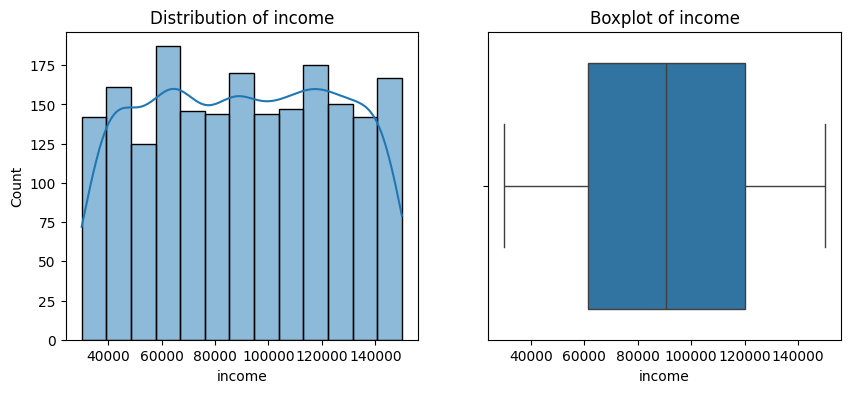

===== INCOME =====
count      2000.000000
mean      90585.977000
std       34487.874907
min       30053.000000
25%       61296.250000
50%       90387.500000
75%      120099.750000
max      149964.000000
Name: income, dtype: float64
Skewness : -0.012115999731385175
Kurtosis : -1.1999095317662922




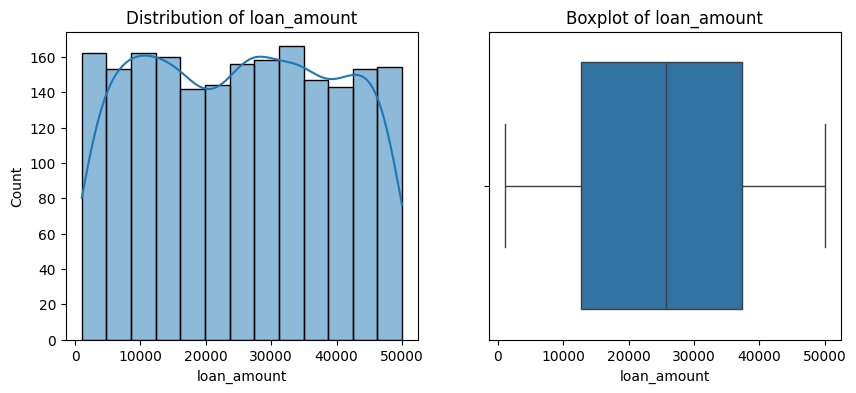

===== LOAN_AMOUNT =====
count     2000.000000
mean     25308.503000
std      14207.320147
min       1022.000000
25%      12748.750000
50%      25661.500000
75%      37380.500000
max      49999.000000
Name: loan_amount, dtype: float64
Skewness : 0.007862566690607996
Kurtosis : -1.2091151429412694




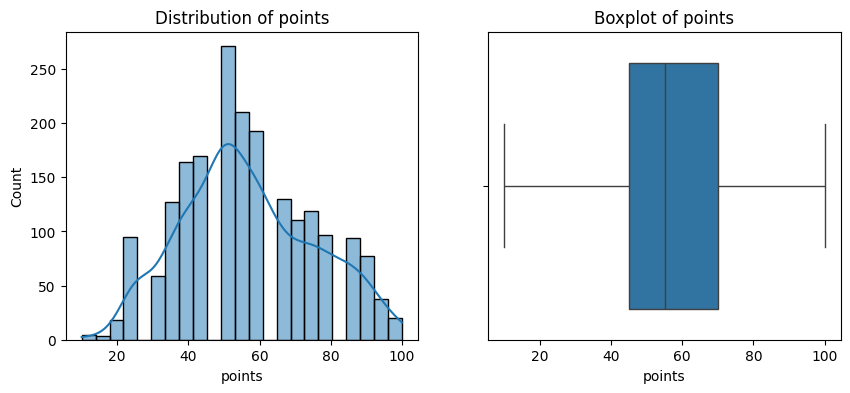

===== POINTS =====
count    2000.000000
mean       56.680000
std        18.638033
min        10.000000
25%        45.000000
50%        55.000000
75%        70.000000
max       100.000000
Name: points, dtype: float64
Skewness : 0.23144642311354405
Kurtosis : -0.5735033518119916




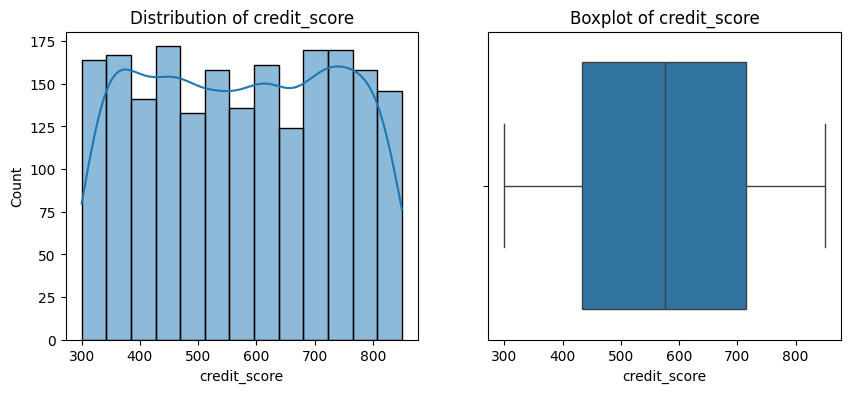

===== CREDIT_SCORE =====
count    2000.000000
mean      573.946000
std       160.564945
min       300.000000
25%       433.000000
50%       576.000000
75%       715.000000
max       850.000000
Name: credit_score, dtype: float64
Skewness : 0.0017205540306714205
Kurtosis : -1.2416677645901166




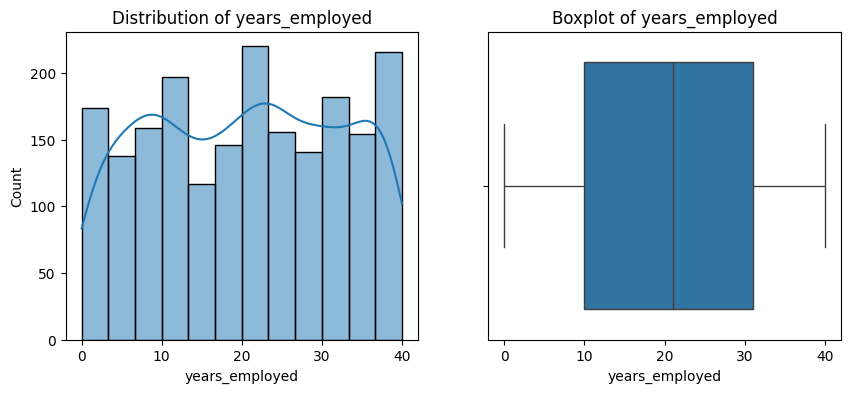

===== YEARS_EMPLOYED =====
count    2000.000000
mean       20.441000
std        11.777813
min         0.000000
25%        10.000000
50%        21.000000
75%        31.000000
max        40.000000
Name: years_employed, dtype: float64
Skewness : -0.027956568967589055
Kurtosis : -1.1924681806680584




In [14]:
numerical_cols = ["income", "loan_amount", "points", "credit_score", "years_employed"]

for col in numerical_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

    print(f"===== {col.upper()} =====")
    print(df[col].describe())
    print("Skewness :", df[col].skew())
    print("Kurtosis :", df[col].kurtosis())
    print("\n")

#### **Target**

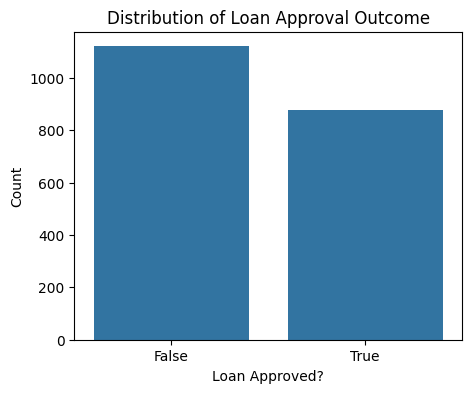

loan_approved
False    1121
True      879
Name: count, dtype: int64

loan_approved
False    56.05
True     43.95
Name: proportion, dtype: float64


In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["loan_approved"])
plt.title("Distribution of Loan Approval Outcome")
plt.xlabel("Loan Approved?")
plt.ylabel("Count")
plt.show()

print(df["loan_approved"].value_counts())
print()
print(df["loan_approved"].value_counts(normalize=True) * 100)

### **Bivariate**

#### **Bivariate Kolom Numerikal**

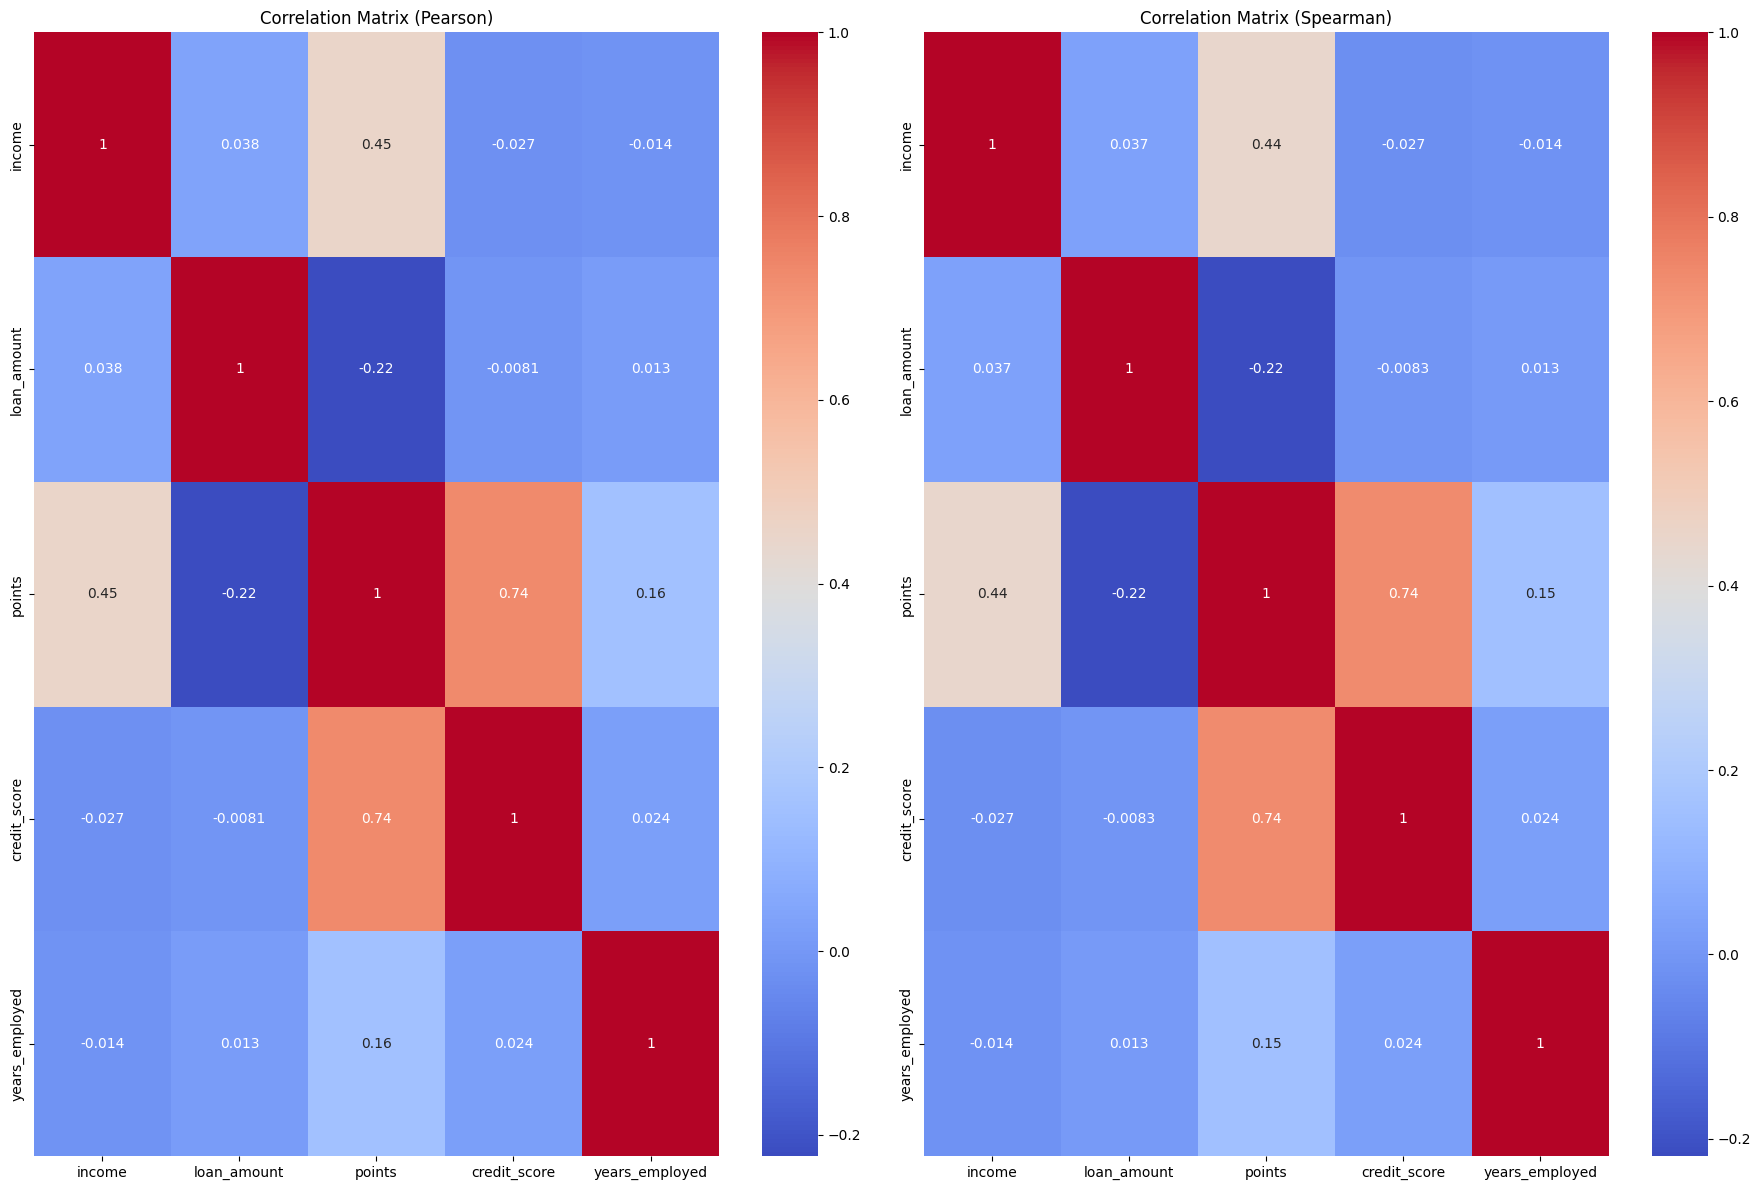

In [ ]:
corr_pearson = df[numerical_cols].corr(method='pearson')
corr_spearman = df[numerical_cols].corr(method='spearman')

fig, ax = plt.subplots(1, 2, figsize=(18, 12))
ax = ax.flatten()

sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Correlation Matrix (Pearson)')

sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Correlation Matrix (Spearman)')

plt.tight_layout()
plt.show()

#### **Bivariate Target + Kolom Numerikal**

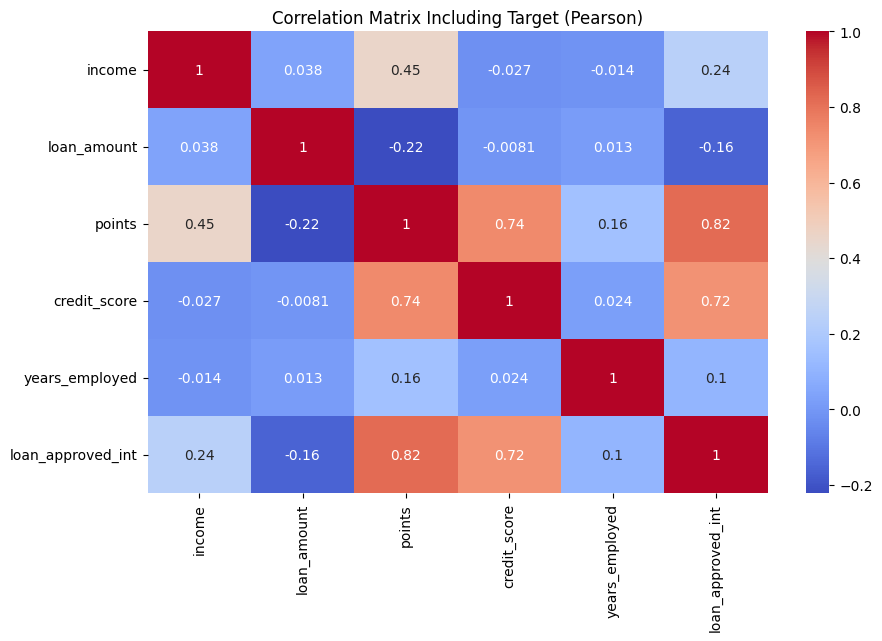

In [20]:
df["loan_approved_int"] = df["loan_approved"].astype(int)

corr_target = df[numerical_cols + ["loan_approved_int"]].corr(method="pearson")

plt.figure(figsize=(10, 6))
sns.heatmap(corr_target, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Including Target (Pearson)")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.